In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tacoma as tc
import contact_networks as cn
import util

# Module for experiments with code snippets

In [2]:
# Simulation walkthrough for a single location
# Load data as a pandas DataFrame
df_base = pd.read_parquet('./VF_data/rns_data_2.parquet')[['p_id', 'activity_start_min', 'loc_id_end', 'activity_name_mct', 'activity_end_min']]
df_base = df_base.astype({'activity_start_min': 'uint32', 'activity_end_min': 'uint32'})
# Set simualtion time, for this example we simulate over the entire time range from the TAPAS data
t_start, t_end = df_base.activity_start_min.min(), df_base.activity_end_min.max()

# Select a location
# group by location and sort by size (number of visitors during simulated day)
locations = df_base.groupby('loc_id_end').size().sort_values(ascending=False).index.values
# Some example locations
loc1018 = df_base[df_base.loc_id_end == locations[1018]]
loc1003 = df_base[df_base.loc_id_end == locations[1003]]
loc1015 = df_base[df_base.loc_id_end == locations[1015]]
loc2101 = df_base[df_base.loc_id_end == locations[2101]]

# Start simulation
# Build Location
Loc = cn.Location(1015, 10, 10, 10, 10)
# Build simulation class
HN = cn.ContactNetwork(loc1018, Loc, t_start, t_end, n_scale=1)
# (optional) set paraemters of simulation class
HN.tlw_max_wt = 100

start


In [3]:
HN.make_movement('baseline')
tn_baseline = HN.make_tacoma_network(None, None)

edge changes errors:  0


In [4]:
# (optional) set paraemters of simulation class
HN.make_movement('random')
HN.p_add = .01
tn010 = HN.make_tacoma_network(None, None)

HN.p_add = .005
tn005 = HN.make_tacoma_network(None, None)

HN.p_add = .001
tn001 = HN.make_tacoma_network(None, None)

edge changes errors:  0
edge changes errors:  0
edge changes errors:  0


(0.0, 2500.0)

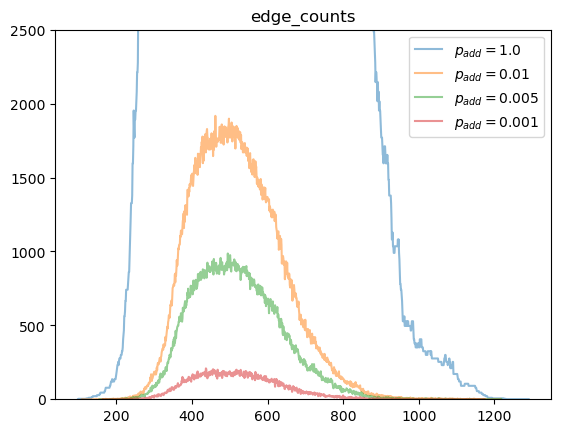

In [9]:
for tn, p_add in zip([tn_baseline, tn010, tn005, tn001], [1., .01, .005, .001]):
    _, _, m = tc.edge_counts(tn)
    plt.title('edge_counts')
    plt.plot(tn.t, m[:-1], alpha=.5, label=r'$p_{add}=$' + str(p_add))

plt.legend()
plt.ylim(0, 2_500)

{'contact': (array([ 1.02154215,  1.06602865,  1.11245245,  1.16089794,  1.21145316,
          1.26420996,  1.31926425,  1.37671605,  1.43666979,  1.49923442,
          1.56452363,  1.63265608,  1.70375559,  1.77795137,  1.85537825,
          1.93617694,  2.02049429,  2.10848352,  2.20030454,  2.29612421,
          2.39611667,  2.50046365,  2.60935476,  2.7229879 ,  2.84156958,
          2.9653153 ,  3.09444995,  3.22920819,  3.36983494,  3.51658576,
          3.66972733,  3.82953797,  3.9963081 ,  4.1703408 ,  4.35195234,
          4.54147276,  4.73924649,  4.94563295,  5.16100719,  5.38576064,
          5.62030173,  5.8650567 ,  6.12047035,  6.38700685,  6.66515058,
          6.95540701,  7.25830364,  7.57439092,  7.90424329,  8.24846019,
          8.60766717,  8.98251704,  9.373691  ,  9.78189995, 10.20788574,
         10.65242251, 11.11631813, 11.60041565, 12.10559483, 12.63277373,
         13.18291042, 13.75700466, 14.35609977, 14.9812845 , 15.633695  ,
         16.31451691, 17.02

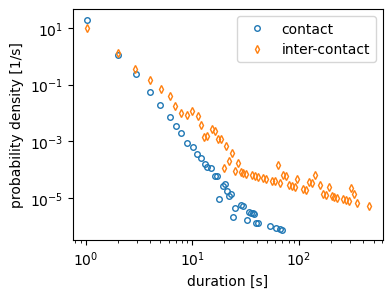

In [11]:
from tacoma.analysis import plot_contact_durations
result = tc.measure_group_sizes_and_durations(tn010)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)

#plt.hist(result.contact_durations, density=True, bins=range(0, 31))

In [12]:
# (optional) set paraemters of simulation class
HN.make_movement('clique')
tn_clique = HN.make_tacoma_network(None, None)

<class 'pandas.core.frame.DataFrame'>
Index: 37787 entries, 0 to 40004
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_A               37787 non-null  int64  
 1   p_B               37787 non-null  int64  
 2   start_of_contact  37787 non-null  int64  
 3   end_of_contact    37787 non-null  int64  
 4   space             37787 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.7 MB
None
edge changes errors:  0


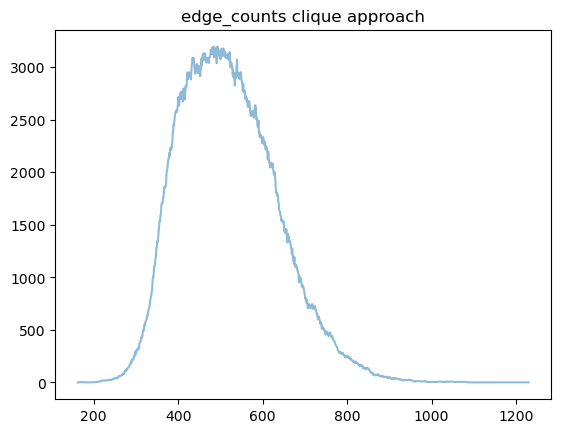

In [13]:
_, _, m = tc.edge_counts(tn_clique)
plt.title('edge_counts clique approach')
plt.plot(tn_clique.t, m[:-1], alpha=.5)


{'contact': (array([  1.03017336,   1.09327886,   1.16025002,   1.23132364,
           1.30675103,   1.38679889,   1.47175025,   1.56190549,
           1.65758339,   1.75912224,   1.86688107,   1.98124091,
           2.1026061 ,   2.23140578,   2.36809536,   2.51315816,
           2.6671071 ,   2.8304865 ,   3.00387407,   3.18788287,
           3.38316352,   3.59040651,   3.81034462,   4.04375551,
           4.2914645 ,   4.55434743,   4.83333382,   5.12941013,
           5.44362323,   5.77708413,   6.1309719 ,   6.50653783,
           6.90510987,   7.32809729,   7.77699572,   8.2533924 ,
           8.75897179,   9.29552153,   9.86493879,  10.46923693,
          11.11055266,  11.79115357,  12.51344616,  13.27998434,
          14.09347847,  14.95680495,  15.87301636,  16.84535227,
          17.87725072,  18.97236034,  20.13455327,  21.36793884,
          22.6768781 ,  24.06599927,  25.54021405,  27.10473505,
          28.76509416,  30.52716216,  32.39716944,  34.38172806,
          36.4

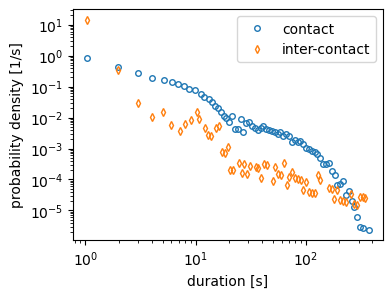

In [14]:
result = tc.measure_group_sizes_and_durations(tn_clique)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)

In [25]:
from tacoma.interactive import visualize
visualize(tn_clique, frame_dt=1) 

changing directory to /home/scho_jj/.tacoma/web
starting server here ... /home/scho_jj/.tacoma/web
preparing network 


127.0.0.1 - - [12/Jan/2024 15:06:24] "GET /?data=tmp_18cfdfec5e6 HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 15:06:24] "GET /tmp_18cfdfec5e6_config.json HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 15:06:25] "GET /tmp_18cfdfec5e6/tmp_18cfdfec5e6_0.taco HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 15:06:25] "GET /tmp_18cfdfec5e6/tmp_18cfdfec5e6_0.json HTTP/1.1" 200 -


stopping server ...
was asked to stop the server
deleted all files


KeyboardInterrupt: 